# Load Data



### Set env variables

assumes that `SOCRATA_APP_TOKEN`, `SOCRATA_API_KEY_ID`, and `SOCRATA_API_KEY_SECRET` are set in `.env`

In [1]:
from dotenv import load_dotenv

load_dotenv()


True

### Load Packages

In [2]:
import os
import sys

INGESTION_PATH = os.path.abspath(os.path.join(os.getcwd(), '..', 'src'))
sys.path.insert(0, INGESTION_PATH)

from ingestion import fetch
from ingestion import config



### Load Data

In [3]:
import polars as pl
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pyarrow as pa

## Exploratory Data Analysis with Polars


In [4]:
data_path = Path("../data/landing/311-service-requests")

lf = pl.scan_parquet(
    str(data_path / "**/*.parquet"),
    hive_partitioning=True,
)

### Basic Information


In [5]:
# Get shape and basic info
print("Dataset Shape:")
print(f"Rows: {lf.select(pl.len()).collect().item():,}")
print(f"Columns: {len(lf.collect_schema())}")
print(f"\nColumn Names and Types:")
for col, dtype in lf.collect_schema().items():
    print(f"  {col}: {dtype}")


Dataset Shape:
Rows: 41,188,398
Columns: 43

Column Names and Types:
  unique_key: String
  created_date: Datetime(time_unit='ms', time_zone=None)
  closed_date: Datetime(time_unit='ms', time_zone=None)
  agency: String
  agency_name: String
  complaint_type: String
  descriptor: String
  location_type: String
  incident_zip: String
  incident_address: String
  street_name: String
  cross_street_1: String
  cross_street_2: String
  intersection_street_1: String
  intersection_street_2: String
  address_type: String
  city: String
  landmark: String
  facility_type: String
  status: String
  due_date: Datetime(time_unit='ms', time_zone=None)
  resolution_description: String
  resolution_action_updated_date: Datetime(time_unit='ms', time_zone=None)
  community_board: String
  bbl: String
  borough: String
  x_coordinate_state_plane: Float64
  y_coordinate_state_plane: Float64
  open_data_channel_type: String
  park_facility_name: String
  park_borough: String
  vehicle_type: String
  tax

### Preview the Data


In [6]:
# Collect a sample to view
lf.head(10).collect()


unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,year,month
str,datetime[ms],datetime[ms],str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,datetime[ms],str,datetime[ms],str,str,str,f64,f64,str,str,str,str,str,str,str,str,str,str,f64,f64,str,i64,i64
"""15630099""",2010-01-01 00:00:00,2010-01-01 00:00:00,"""HPD""","""Department of Housing Preserva…","""HEATING""","""HEAT""","""RESIDENTIAL BUILDING""","""10466""","""1405 EAST 233 STREET""","""EAST 233 STREET""","""SETON AVENUE""","""AMUNDSON AVENUE""",null,null,"""ADDRESS""","""BRONX""",null,"""N/A""","""Closed""",null,"""The Department of Housing Pres…",2010-01-01 00:00:00,"""0 Unspecified""","""2049610077""","""Unspecified""",1.029542e6,263206.0,"""UNKNOWN""","""Unspecified""","""Unspecified""",null,null,null,null,null,null,null,40.888997,-73.836192,"""{'latitude': '40.8889973845275…",2010,1
"""15630431""",2010-01-01 00:00:00,2010-01-02 00:00:00,"""HPD""","""Department of Housing Preserva…","""HEATING""","""HEAT""","""RESIDENTIAL BUILDING""","""11226""","""22 MARTENSE STREET""","""MARTENSE STREET""","""FLATBUSH AVENUE""","""MARTENSE COURT""",null,null,"""ADDRESS""","""BROOKLYN""",null,"""N/A""","""Closed""",null,"""More than one complaint was re…",2010-01-02 00:00:00,"""0 Unspecified""","""3050890015""","""Unspecified""",995823.0,176542.0,"""UNKNOWN""","""Unspecified""","""Unspecified""",null,null,null,null,null,null,null,40.651236,-73.958293,"""{'latitude': '40.6512361161984…",2010,1
"""15630315""",2010-01-01 00:00:00,2010-01-16 00:00:00,"""HPD""","""Department of Housing Preserva…","""PLUMBING""","""BASIN/SINK""","""RESIDENTIAL BUILDING""","""11106""","""31-54 29 STREET""","""29 STREET""","""31 AVENUE""","""BROADWAY""",null,null,"""ADDRESS""","""ASTORIA""",null,"""N/A""","""Closed""",null,"""The Department of Housing Pres…",2010-01-16 00:00:00,"""0 Unspecified""","""4005797501""","""Unspecified""",1.004767e6,217644.0,"""UNKNOWN""","""Unspecified""","""Unspecified""",null,null,null,null,null,null,null,40.764035,-73.925935,"""{'latitude': '40.7640351269140…",2010,1
"""15631513""",2010-01-01 00:00:00,2010-01-02 00:00:00,"""HPD""","""Department of Housing Preserva…","""HEATING""","""HEAT""","""RESIDENTIAL BUILDING""","""11210""","""3103 FOSTER AVENUE""","""FOSTER AVENUE""","""NOSTRAND AVENUE""","""NEW YORK AVENUE""",null,null,"""ADDRESS""","""BROOKLYN""",null,"""N/A""","""Closed""",null,"""More than one complaint was re…",2010-01-02 00:00:00,"""0 Unspecified""","""3049640047""","""Unspecified""",998974.0,171975.0,"""UNKNOWN""","""Unspecified""","""Unspecified""",null,null,null,null,null,null,null,40.638696,-73.946947,"""{'latitude': '40.6386960094759…",2010,1
"""15629899""",2010-01-01 00:00:00,2010-01-16 00:00:00,"""HPD""","""Department of Housing Preserva…","""PLUMBING""","""WATER-LEAKS""","""RESIDENTIAL BUILDING""","""11106""","""31-54 29 STREET""","""29 STREET""","""31 AVENUE""","""BROADWAY""",null,null,"""ADDRESS""","""ASTORIA""",null,"""N/A""","""Closed""",null,"""The Department of Housing Pres…",2010-01-16 00:00:00,"""0 Unspecified""","""4005797501""","""Unspecified""",1.004767e6,217644.0,"""UNKNOWN""","""Unspecified""","""Unspecified""",null,null,null,null,null,null,null,40.764035,-73.925935,"""{'latitude': '40.7640351269140…",2010,1
"""15631565""",2010-01-01 00:00:00,2010-01-05 00:00:00,"""HPD""","""Department of Housing Preserva…","""HEATING""","""HEAT""","""RESIDENTIAL BUILDING""","""11213""","

### Missing Values Analysis


In [7]:
total_rows = lf.select(pl.len()).collect().item()

cols = lf.collect_schema().names()
chunk_size = 10  # number of columns per batch
null_counts_list = []

for i in range(0, len(cols), chunk_size):
    chunk_cols = cols[i:i+chunk_size]
    exprs = [pl.col(col).is_null().sum().alias(col) for col in chunk_cols]
    null_counts_chunk = lf.select(exprs).collect()
    null_counts_list.append(null_counts_chunk)

# Combine results into a single DataFrame
df_nulls = pl.concat(null_counts_list, how="horizontal").to_pandas()
df_nulls = df_nulls.transpose().rename(columns = {0 : 'count'})
df_nulls['pct'] = df_nulls['count'] / total_rows

In [8]:
df_nulls.sort_values(by = 'pct', ascending = False)

,count,pct
taxi_company_borough,41158784,0.999281
road_ramp,41094402,0.997718
bridge_highway_direction,41072784,0.997193
bridge_highway_name,41017072,0.995840
bridge_highway_segment,41013461,0.995753
vehicle_type,40878284,0.992471
taxi_pick_up_location,40850705,0.991801
due_date,32452012,0.787892
landmark,29846412,0.724632
intersection_street_1,25099229,0.609376


### Top Complaint Types


In [9]:
# Top complaint types
top_complaints = lf.group_by("complaint_type").agg([
    pl.len().alias("count")
]).sort("count", descending=True).collect()

df_complaints = top_complaints.to_pandas()
df_complaints['pct'] = df_complaints['count'] / total_rows

In [10]:
df_complaints[df_complaints['pct'] > 0.01]

,complaint_type,count,pct
0,Noise - Residential,3969725,0.096380
1,Illegal Parking,3248798,0.078877
2,HEAT/HOT WATER,2525038,0.061305
3,Blocked Driveway,1807098,0.043874
4,Noise - Street/Sidewalk,1484893,0.036051
5,Street Condition,1360764,0.033038
6,Street Light Condition,1182067,0.028699
7,Request Large Bulky Item Collection,1070478,0.025990
8,PLUMBING,1018077,0.024718
9,Water System,998215,0.024235


### Temporal Analysis


In [11]:
# Get top 20 complaint types first
top_20_complaints = lf.group_by("complaint_type").agg([
    pl.len().alias("count")
]).sort("count", descending=True).limit(20).collect()

top_20_list = top_20_complaints.select("complaint_type").to_series().to_list()

# Requests over time (by year-month) for top 20 complaint types
temporal = lf.filter(
    pl.col("complaint_type").is_in(top_20_list)
).group_by(["year", "month", "complaint_type"]).agg([
    pl.len().alias("num_requests")
]).sort(["year", "month"]).collect()

df_plotting_data = temporal.to_pandas()
df_plotting_data['date'] = df_plotting_data.apply(lambda row: pd.to_datetime(f"{row['year']}-{row['month']}-01"), axis=1)



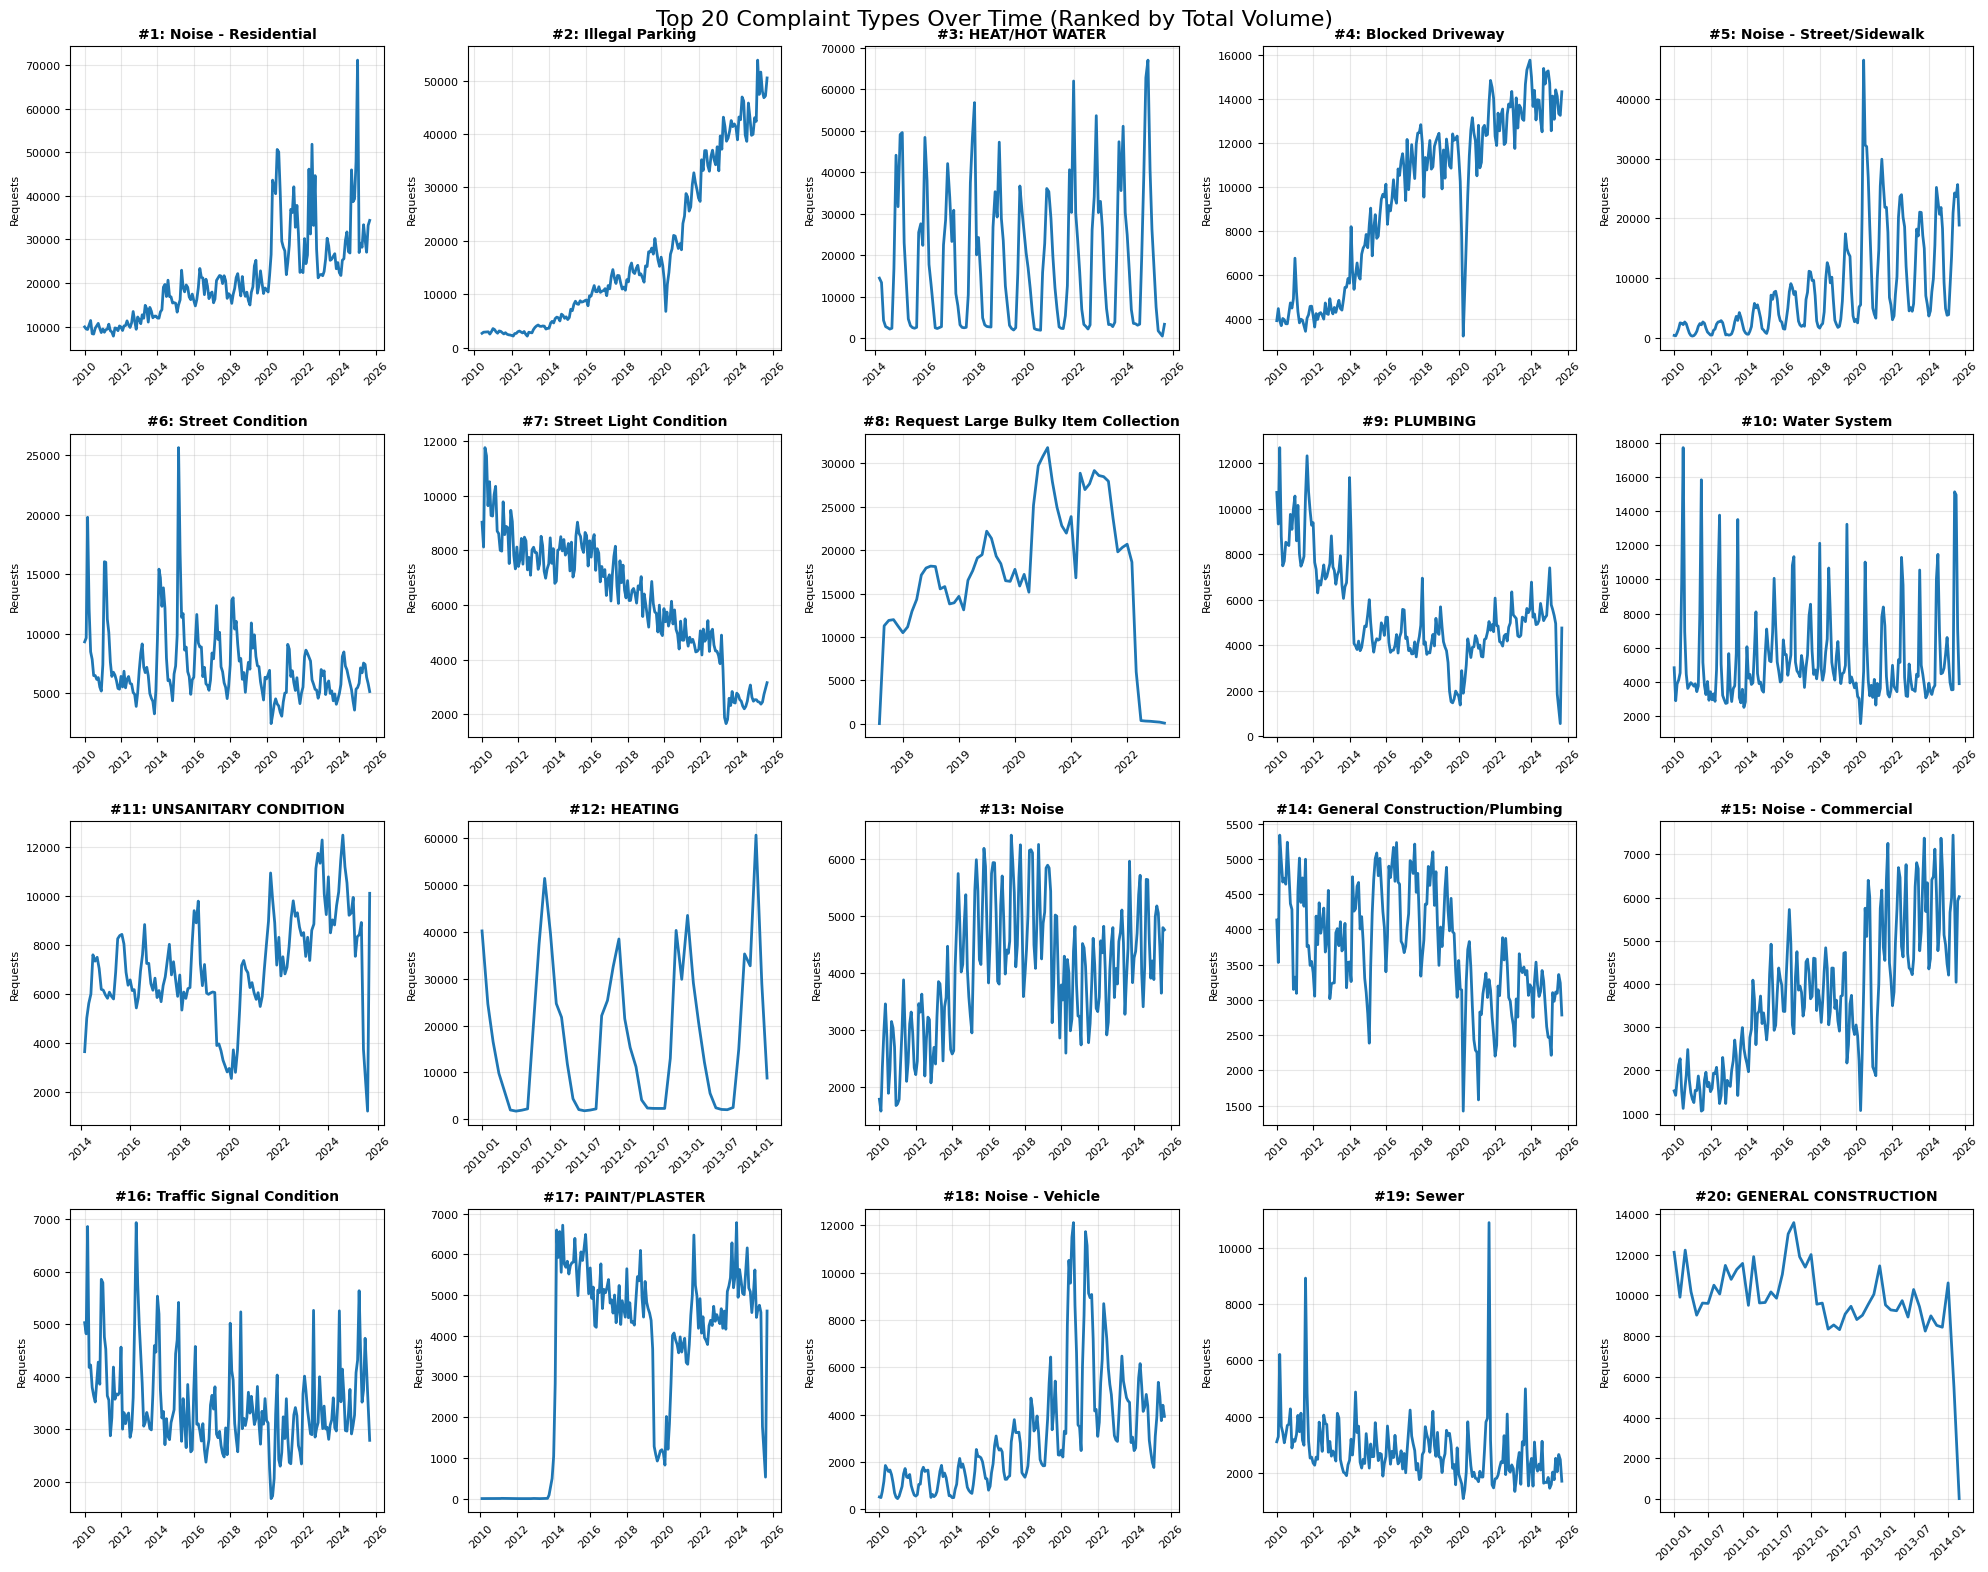

In [12]:
# Plot using seaborn with 4x5 subplots
fig, axes = plt.subplots(4, 5, figsize=(20, 16))
fig.suptitle('Top 20 Complaint Types Over Time (Ranked by Total Volume)', fontsize=16)

# Flatten axes for easier indexing
axes = axes.flatten()

# Sort complaint types by total count (most common first)
complaint_totals = df_plotting_data.groupby('complaint_type')['num_requests'].sum().sort_values(ascending=False)
complaint_types = complaint_totals.index.tolist()

for i, complaint_type in enumerate(complaint_types):
    # Filter data for this complaint type
    data_subset = df_plotting_data[df_plotting_data['complaint_type'] == complaint_type]
    
    # Plot on the corresponding subplot using seaborn
    sns.lineplot(data=data_subset, x='date', y='num_requests', ax=axes[i], linewidth=2)
    axes[i].set_title(f'#{i+1}: {complaint_type}', fontsize=10, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45, labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)
    axes[i].grid(True, alpha=0.3)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Requests', fontsize=8)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Geographic Distribution


In [13]:
# Requests by borough
by_borough = lf.group_by("borough").agg([
    pl.len().alias("count")
]).sort("count", descending=True).collect()


print("Service Requests by Borough:")
by_borough


Service Requests by Borough:


borough,count
str,u32
"""BROOKLYN""",12306992
"""QUEENS""",9690506
"""MANHATTAN""",8124662
"""BRONX""",7830739
"""STATEN ISLAND""",1950174
"""Unspecified""",1245802
null,39523


### Agency Analysis


In [14]:
# Number of unique agency_name values by agency
agency_names_by_agency = lf.group_by("agency").agg([
    pl.col("agency_name").unique().alias("unique_agency_names"),
    pl.col("agency_name").n_unique().alias("nunique_agency_names"),
    pl.len().alias("count")
]).sort("count", descending=True).collect()

print("Number of unique agency_name values by agency:")
df_agency = agency_names_by_agency.to_pandas()

Number of unique agency_name values by agency:


In [15]:
with pd.option_context('display.max_colwidth', 200):
    display(df_agency)

,agency,unique_agency_names,nunique_agency_names,count
0,NYPD,"[Traffic Management Center, New York City Police Department, NYPD, Investigation Review Section, New York Police Precinct]",5,13494187
1,HPD,"[Division of Alternative Management, Department of Housing Preservation and Development, HPD]",3,9442409
2,DSNY,[Department of Sanitation],1,4546813
3,DOT,"[DOT, Department of Transportation]",2,4288655
4,DEP,[Department of Environmental Protection],1,2720944
5,DOB,"[Department of Buildings, DOB Inspections - Queens, DOB Inspections - Staten Island, DOB Inspections - Brooklyn, DOB Inspections - Bronx, DOB Inspections - Manhattan, DOB]",7,1743547
6,DPR,"[DPR, Department of Parks and Recreation]",2,1689821
7,DOHMH,"[Mosquito Control, Bureau of Tobacco Control, Child Care and Camps Complaint Unit, DOHMH, Department of Health and Mental Hygiene]",5,1030037
8,DOF,"[Exemption Unit, Revenue Accounting, Accounts Examination, Office of the Taxpayer Advocate, Senior Citizen Rent Increase Exemption Unit, Land Records, DRIE Unit, Adjudication - Appeals Unit, Dunni...",28,509891
9,DHS,"[Department of Homeless Services, DHS Advantage Programs, Operations Unit - Department of Homeless Services]",3,441620


In [16]:
# Counts of complaints for specific agencies: DOHMH, HPD, DSNY split by complaint_type
complaints_by_agency = lf.filter(
    pl.col("agency").is_in(["DOHMH", "HPD", "DSNY"])
).group_by(["agency", "complaint_type"]).agg([
    pl.len().alias("count")
]).with_columns([
    (pl.col("count") / pl.col("count").sum().over("agency")).alias("pct_within_agency")
]).sort(["agency", "count"], descending=[False, True]).collect()

print("Complaint counts for DOHMH, HPD, DSNY by complaint type:")
df_complaints_by_agency = complaints_by_agency.to_pandas()

# df_complaints_by_agency['pct'] = df_complaints_by_agency['count'] / df_complaints['count'].sum()

df_complaints_by_agency[df_complaints_by_agency['pct_within_agency'] > 0.01]

Complaint counts for DOHMH, HPD, DSNY by complaint type:


,agency,complaint_type,count,pct_within_agency
0,DOHMH,Rodent,488764,0.474511
1,DOHMH,Food Establishment,146250,0.141985
2,DOHMH,Indoor Air Quality,82284,0.079885
3,DOHMH,Food Poisoning,45307,0.043986
4,DOHMH,Smoking,35456,0.034422
5,DOHMH,Unsanitary Animal Pvt Property,34422,0.033418
6,DOHMH,Standing Water,30015,0.029140
7,DOHMH,Mobile Food Vendor,26721,0.025942
8,DOHMH,Non-Residential Heat,16864,0.016372
9,DOHMH,Unleashed Dog,15611,0.015156


### Status Distribution


In [17]:
# Request status distribution
status_dist = lf.group_by("status").agg([
    pl.len().alias("count"),
    pl.col("closed_date").is_not_null().sum().alias("closed_dt_not_null")
]).with_columns([
    (pl.col("closed_dt_not_null") / pl.col("count")).alias("pct_with_closed_dt")
]).sort("count", descending=True).collect()

print("Status Distribution:")
status_dist


Status Distribution:


status,count,closed_dt_not_null,pct_with_closed_dt
str,u32,u32,f64
"""Closed""",40077055,40021102,0.998604
"""Pending""",353888,278041,0.785675
"""Open""",303002,24854,0.082026
"""In Progress""",259403,416,0.001604
"""Assigned""",177105,28714,0.16213
…,…,…,…
"""Unassigned""",45,5,0.111111
"""Closed - Testing""",38,9,0.236842
"""Draft""",18,0,0.0


### Response Time Analysis


In [18]:
# Calculate response times where both created_date and closed_date exist
response_times = lf.filter(
    pl.col("closed_date").is_not_null() & pl.col("created_date").is_not_null()
).with_columns([
    pl.col("created_date").alias("created_dt"),
    pl.col("closed_date").alias("closed_dt")
]).with_columns([
    (pl.col("closed_dt") - pl.col("created_dt")).dt.total_hours().alias("response_hours")
]).filter(
    pl.col("response_hours") >= 0  # Only positive response times
).select([
    pl.col("response_hours").mean().alias("mean_hours"),
    pl.col("response_hours").median().alias("median_hours"),
    pl.col("response_hours").std().alias("std_hours"),
    pl.col("response_hours").min().alias("min_hours"),
    pl.col("response_hours").max().alias("max_hours"),
    pl.col("response_hours").quantile(0.25).alias("q25_hours"),
    pl.col("response_hours").quantile(0.75).alias("q75_hours"),
    pl.col("response_hours").quantile(0.90).alias("q90_hours"),
    pl.len().alias("count_with_close_date")
]).collect()

print("Response Time Statistics (in hours):")
response_times


Response Time Statistics (in hours):


mean_hours,median_hours,std_hours,min_hours,max_hours,q25_hours,q75_hours,q90_hours,count_with_close_date
f64,f64,f64,i64,i64,f64,f64,f64,u32
522.026559,24.0,3234.264479,0,1675090,1.0,144.0,587.0,40075508


In [19]:
# Get top 20 complaint types first
top_20_complaints = lf.group_by("complaint_type").agg([
    pl.len().alias("count")
]).sort("count", descending=True).head(20).select("complaint_type").collect()

top_20_list = top_20_complaints["complaint_type"].to_list()

# Calculate response times by complaint type for top 20 complaint types
response_times_by_complaint = lf.filter(
    pl.col("closed_date").is_not_null() & 
    pl.col("created_date").is_not_null() &
    pl.col("complaint_type").is_in(top_20_list)
).with_columns([
    pl.col("created_date").alias("created_dt"),
    pl.col("closed_date").alias("closed_dt")
]).with_columns([
    (pl.col("closed_dt") - pl.col("created_dt")).dt.total_hours().alias("response_hours")
]).filter(
    pl.col("response_hours") >= 0  # Only positive response times
).group_by("complaint_type").agg([
    pl.col("response_hours").mean().alias("mean_hours"),
    pl.col("response_hours").median().alias("median_hours"),
    pl.col("response_hours").std().alias("std_hours"),
    pl.col("response_hours").min().alias("min_hours"),
    pl.col("response_hours").max().alias("max_hours"),
    pl.col("response_hours").quantile(0.25).alias("q25_hours"),
    pl.col("response_hours").quantile(0.75).alias("q75_hours"),
    pl.col("response_hours").quantile(0.90).alias("q90_hours"),
    pl.len().alias("count_with_close_date")
]).sort("mean_hours").collect()

print("Response Time Statistics by Top 20 Complaint Types (in hours):")
df_response_times = response_times_by_complaint.to_pandas()
df_response_times


Response Time Statistics by Top 20 Complaint Types (in hours):


,complaint_type,mean_hours,median_hours,std_hours,min_hours,max_hours,q25_hours,q75_hours,q90_hours,count_with_close_date
0,Noise - Commercial,2.461544,1.0,56.010864,0,15252,0.0,2.0,5.0,699186
1,Noise - Vehicle,2.910465,0.0,93.640306,0,25429,0.0,2.0,5.0,583870
2,Illegal Parking,3.614624,1.0,91.607340,0,25731,0.0,3.0,6.0,3245972
3,Noise - Street/Sidewalk,4.000248,0.0,165.316055,0,25860,0.0,2.0,4.0,1483658
4,Blocked Driveway,4.846760,2.0,119.957459,0,16635,0.0,4.0,8.0,1805991
5,Noise - Residential,6.946568,1.0,157.218161,0,25954,0.0,3.0,7.0,3966980
6,HEAT/HOT WATER,67.820254,49.0,485.301866,0,80752,27.0,82.0,120.0,2518529
7,Request Large Bulky Item Collection,95.849790,68.0,115.491212,0,5746,37.0,111.0,178.0,1068511
8,HEATING,101.836662,72.0,458.115773,0,57048,48.0,120.0,168.0,879300
9,Noise,123.359129,77.0,439.462583,0,70380,26.0,165.0,217.0,762902


### Due Date

In [20]:
# Breakdown by due_date null status, complaint_type, and agency
due_date_breakdown = lf.with_columns([
    pl.col("due_date").is_null().cast(pl.Int32).alias("due_date_is_null")
]).group_by(["due_date_is_null", "complaint_type"]).agg([
    pl.len().alias("count")
]).sort("count", descending=True).collect()

print("Breakdown by due_date null status, complaint_type:")
df_due_date = due_date_breakdown.to_pandas()
df_due_date = df_due_date.pivot(index = 'complaint_type', columns = 'due_date_is_null', values = 'count')
df_due_date['total'] = df_due_date.sum(axis = 1)
df_due_date['missing_pct'] = df_due_date[1] / df_due_date['total']
df_due_date.sort_values(by = 'total', ascending=False).iloc[:20]
df_due_date

Breakdown by due_date null status, complaint_type:


due_date_is_null,0,1,total,missing_pct
complaint_type,,,,
$(sleep 11),1.0,NaN,1.0,NaN
${3804*3137},1.0,NaN,1.0,NaN
%2fetc%2fpasswd,1.0,NaN,1.0,NaN
%E5%98%8A%E5%98%8DX-Injecti...,1.0,NaN,1.0,NaN
%c0%ae/%c0%ae/%c0%ae/%c0%ae...,1.0,NaN,1.0,NaN
...,...,...,...,...
bcd9&lt;!--esi--&gt;1ggp&lt...,1.0,NaN,1.0,NaN
file:///etc/passwd,1.0,NaN,1.0,NaN
g0oii1s4s5)(objectClass=*,1.0,NaN,1.0,NaN


In [21]:
# Breakdown by due_date null status by agency
due_date_breakdown = lf.with_columns([
    pl.col("due_date").is_null().cast(pl.Int32).alias("due_date_is_null")
]).group_by(["due_date_is_null", "agency"]).agg([
    pl.len().alias("count")
]).sort("count", descending=True).collect()

print("Breakdown by due_date null status by agency:")
df_due_date = due_date_breakdown.to_pandas()
df_due_date = df_due_date.pivot(index = 'agency', columns = 'due_date_is_null', values = 'count')
df_due_date['total'] = df_due_date.sum(axis = 1)
df_due_date['missing_pct'] = df_due_date[1] / df_due_date['total']
df_due_date.sort_values(by = 'total', ascending=False).iloc[:20]
df_due_date

Breakdown by due_date null status by agency:


due_date_is_null,0,1,total,missing_pct
agency,,,,
3-1-1,22.0,20557.0,20579.0,0.998931
ACS,1226.0,NaN,1226.0,NaN
CEO,5.0,NaN,5.0,NaN
COIB,15.0,NaN,15.0,NaN
DCAS,1848.0,NaN,1848.0,NaN
DCP,86.0,NaN,86.0,NaN
DCWP,187769.0,140489.0,328258.0,0.427983
DEP,356.0,2720588.0,2720944.0,0.999869
DFTA,92291.0,2727.0,95018.0,0.028700


In [22]:
# Filter for DOHMH agency and add derived columns
dohmh_data_only = lf.filter(pl.col("agency") == "DOHMH").select([
    "due_date",
    "landmark",
    "intersection_street_1",
    "intersection_street_2",
    "facility_type",
    "cross_street_2",
    "cross_street_1",
    "bbl",
    "location_type",
    "street_name",
    "incident_address",
    "address_type",
    "longitude",
    "location",
    "latitude",
    "x_coordinate_state_plane",
    "y_coordinate_state_plane",
    "city",
    "incident_zip",
    "resolution_description",
    "closed_date",
    "resolution_action_updated_date",
    "descriptor",
    "community_board",
    "park_borough",
    "borough",
    "unique_key",
    "created_date",
    "agency_name",
    "agency",
    "complaint_type",
    "status",
    "open_data_channel_type",
    "park_facility_name",
    "year",
    "month"
]).collect()

print("DOHMH filtered data with derived columns:")
df_dohmh = dohmh_data_only.to_pandas()

DOHMH filtered data with derived columns:


In [23]:
df_dohmh[df_dohmh['status'] == 'Closed'].iloc[2]['resolution_description']

'The Department of Health and Mental Hygiene regulates restaurants and other establishments that mostly sell food which is prepared on the premises. New York State Agriculture and Markets regulates those establishments that mostly sell pre-packaged food, including supermarkets, bodegas, green markets, fish and meat markets, and delis. This Service Request involves an establishment under the jurisdiction of the New York State Agriculture and Markets. For complaint status, call (718) 722-2876.'

In [24]:
def map_complaints(df):
        complaint_to_family = {
        "Food Establishment": "food_safety",
        "Rodent": "vector_control",
        "Non-Residential Heat": "housing_health",
        "Food Poisoning": "food_safety",
        "Unsanitary Animal Pvt Property": "animal_control",
        "Smoking": "air_smoke_mold",
        "Indoor Air Quality": "air_smoke_mold",
        "Window Guard": "housing_health",
        "Unsanitary Pigeon Condition": "vector_control",
        "Harboring Bees/Wasps": "vector_control",
        "Asbestos": "hazmat_lead_asbestos",
        "Unleashed Dog": "animal_control",
        "Unsanitary Animal Facility": "animal_control",
        "Tattooing": "childcare_recreation",
        "Beach/Pool/Sauna Complaint": "childcare_recreation",
        "Animal Facility - No Permit": "animal_control",
        "Mold": "air_smoke_mold",
        "Portable Toilet": "misc_other",
        "Illegal Animal Kept as Pet": "animal_control",
        "Calorie Labeling": "food_safety",
        "Drinking Water": "water_quality",
        "Poison Ivy": "misc_other",
        "Illegal Animal Sold": "animal_control",
        "Bottled Water": "water_quality",
        "Radioactive Material": "hazmat_lead_asbestos",
        "Lifeguard": "childcare_recreation",
        "Trans Fat": "food_safety",
        "Summer Camp": "childcare_recreation",
        "X-Ray Machine/Equipment": "hazmat_lead_asbestos",
        "Trapping Pigeon": "vector_control",
        "Indoor Sewage": "air_smoke_mold",
        "Damaged Tree": "misc_other",
        "Unlicensed Dog": "animal_control",
        "Standing Water": "vector_control",
        "DPR Internal": "misc_other",
        "DOF Literature Request": "misc_other",
        "Animal in a Park": "animal_control",
        "Tanning": "childcare_recreation",
        "Day Care": "childcare_recreation",
        "Asbestos/Garbage Nuisance": "hazmat_lead_asbestos",
        "Mosquitoes": "vector_control",
        "LEAD": "hazmat_lead_asbestos",
        "Forms": "misc_other",
        "MOLD": "air_smoke_mold",
        "Cooling Tower": "cooling_tower",
        "Pet Shop": "animal_control",
        "Traffic Signal Condition": "misc_other",
        "Injured Wildlife": "animal_control",
        "Illegal Animal - Sold/Kept": "animal_control",
        "Mobile Food Vendor": "food_safety",
        "Construction Lead Dust": "hazmat_lead_asbestos",
        "Peeling Paint": "hazmat_lead_asbestos",
        "Vaccine Mandate Non-Compliance": "tobacco_enforcement",
        "Face Covering Violation": "tobacco_enforcement",
        "Private School Vaccine Mandate Non-Compliance": "tobacco_enforcement",
        "Building Drinking Water Tank": "water_quality",
        "Smoking or Vaping": "air_smoke_mold",
        "Tobacco or Non-Tobacco Sale": "tobacco_enforcement",
        "ASBESTOS": "hazmat_lead_asbestos",
        "Pet Sale": "animal_control",
        "Lost Property": "misc_other",
        }

        # Optional family -> skill tag used in staffing
        family_to_skill = {
        "food_safety": "food",
        "vector_control": "vector",
        "air_smoke_mold": "ieq",
        "hazmat_lead_asbestos": "hazmat",
        "water_quality": "water",
        "cooling_tower": "legionella",
        "animal_control": "animal",
        "childcare_recreation": "community_env",
        "tobacco_enforcement": "enforcement",
        "housing_health": "community_env",
        "misc_other": "generalist",
        }

        # Apply to your dataframe `df`
        df = df.copy()
        df["family"] = df["complaint_type"].map(complaint_to_family)
        df["skill_tag"] = df["family"].map(family_to_skill)

        return df

In [25]:
# ============================
#  DOHMH 311 — ML PRODUCT CODE
#  Forecast (7-day), Triage, Time-to-Close
#  Assumes `df` is a pandas.DataFrame with your listed columns.
# ============================

import numpy as np
import pandas as pd
from datetime import timedelta

# ML
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, average_precision_score, brier_score_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import QuantileRegressor
from lightgbm import LGBMRegressor, LGBMClassifier

# Geo (H3 hex index)
import h3

# ------------------------------------------------------------
# 0) BASIC PREP
# ------------------------------------------------------------

def prep_df(df: pd.DataFrame, h3_res: int = 8) -> pd.DataFrame:
    """Parse dates, map families, add H3 hex, and basic calendar cols."""
    df = df.copy()
    # Parse datetimes
    for col in ["created_date", "closed_date", "due_date", "resolution_action_updated_date"]:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors="coerce")
    # Derive helpers
    df["day"] = df["created_date"].dt.floor("D")
    df["hour"] = df["created_date"].dt.hour
    df["dow"] = df["created_date"].dt.dayofweek  # 0=Mon
    df["is_closed"] = df["closed_date"].notna()
    df["duration_hours"] = (df["closed_date"] - df["created_date"]).dt.total_seconds() / 3600.0
    df["sla_breach"] = np.where(
        df["is_closed"],
        (df["closed_date"] > df["due_date"]).astype(int),
        np.nan
    )
    # H3 index (skip rows without lat/lon)
    mask_geo = df["latitude"].notna() & df["longitude"].notna()
    df.loc[mask_geo, "hex"] = [
        h3.latlng_to_cell(float(lat), float(lon), h3_res)
        for lat, lon in zip(df.loc[mask_geo, "latitude"], df.loc[mask_geo, "longitude"])
    ]
    df.loc[~mask_geo, "hex"] = np.nan

    # Complaint family mapping (adjust to your taxonomy)

    df = map_complaints(df)

    # Weak proxy for "significant finding" from resolution text (tune with inspection joins later)
    reso = df["resolution_description"].fillna("").str.lower()
    df["is_significant"] = (
        reso.str.contains("violation|summons|hazard|conditions found|critical", regex=True)
    ).astype(int)
    # Only meaningful for closed rows
    df.loc[~df["is_closed"], "is_significant"] = np.nan

    # Minimal address key for "repeat" (fallback to hex if address missing)
    addr_key = df["incident_address"].fillna("") \
        + "|" + df["street_name"].fillna("") \
        + "|" + df["incident_zip"].fillna("").astype(str)
    df["site_key"] = np.where(addr_key.str.len() > 2, addr_key, df["hex"].fillna("NA"))

    return df


# ------------------------------------------------------------
# 1) FORECAST — 7-day, direct multi-horizon by [hex, family, day]
# ------------------------------------------------------------

def make_forecast_panel(df: pd.DataFrame) -> pd.DataFrame:
    """Aggregate to daily counts and build lag/rolling features."""
    g = (
        df.groupby(["hex", "family", "day"], dropna=False)
          .size()
          .rename("y")
          .reset_index()
    )
    # complete date ranges per [hex, family]
    def complete_group(gdf):
        if gdf["day"].isna().all():
            return gdf  # skip all-NaN groups
        idx = pd.date_range(gdf["day"].min(), gdf["day"].max(), freq="D")
        gdf = gdf.set_index("day").reindex(idx).rename_axis("day").reset_index()
        return gdf

    g = (
        g.groupby(["hex", "family"], dropna=False, group_keys=False)
         .apply(complete_group)
         .reset_index(drop=True)
    )
    g[["hex", "family"]] = g[["hex", "family"]].ffill().bfill()
    g["y"] = g["y"].fillna(0.0)

    # Calendar features
    g["dow"] = g["day"].dt.dayofweek
    g["week"] = g["day"].dt.isocalendar().week.astype(int)
    g["month"] = g["day"].dt.month

    # Lags & rollings per [hex, family]
    g = g.sort_values(["hex", "family", "day"])
    for lag in [1, 7]:
        g[f"lag{lag}"] = g.groupby(["hex", "family"])["y"].shift(lag)
    g["roll7"]  = g.groupby(["hex", "family"])["y"].rolling(7, min_periods=1).mean().reset_index(level=[0,1], drop=True).shift(1)
    g["roll28"] = g.groupby(["hex", "family"])["y"].rolling(28, min_periods=1).mean().reset_index(level=[0,1], drop=True).shift(1)
    g["momentum"] = np.where(g["roll28"].fillna(0) > 0, g["roll7"] / g["roll28"], 1.0)

    # Train/valid mask (leave last 7 days for scoring)
    g["is_train"] = g["day"] < (g["day"].max() - pd.Timedelta(days=7))
    return g


def train_forecast_models(panel: pd.DataFrame, horizons=range(1, 8)):
    """Train LGBM Poisson models for h=1..7."""
    models = {}
    feature_cols = [
        "dow", "week", "month", "lag1", "lag7", "roll7", "roll28", "momentum"
    ]
    # Use hex & family as categorical IDs (entity embeddings not available in LGBM directly)
    # We one-hot encode small-ish cardinalities; for large, consider target encoding.
    cat_cols = ["hex", "family"]
    X_all = panel[feature_cols + cat_cols].copy()
    y_all = panel["y"].copy()

    X_train = X_all[panel["is_train"]]
    y_train = y_all[panel["is_train"]]

    pre = ColumnTransformer([
        ("onehot", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ], remainder="passthrough")

    for h in horizons:
        # build target y_{t+h} by shifting within each series
        panel_sorted = panel.sort_values(["hex", "family", "day"]).copy()
        panel_sorted[f"y_h{h}"] = panel_sorted.groupby(["hex", "family"])["y"].shift(-h)
        y_h = panel_sorted.loc[panel_sorted["is_train"], f"y_h{h}"]

        # drop rows with NaN y_h (tail)
        mask = y_h.notna()
        y_h = y_h[mask]
        X_h = X_train.loc[mask]

        model = Pipeline([
            ("prep", pre),
            ("lgb", LGBMRegressor(
                objective="poisson",        # reasonable for counts
                n_estimators=600,
                learning_rate=0.05,
                subsample=0.8,
                colsample_bytree=0.8,
                max_depth=-1,
                reg_alpha=0.0,
                reg_lambda=0.0,
                random_state=42
            ))
        ])
        model.fit(X_h, y_h)
        models[h] = model

    return {
        "models": models,
        "feature_cols": feature_cols,
        "cat_cols": cat_cols
    }


def score_forecast_7d(panel: pd.DataFrame, bundle) -> pd.DataFrame:
    """Score next 7 days for each [hex, family] using direct models."""
    models = bundle["models"]
    feature_cols = bundle["feature_cols"]
    cat_cols = bundle["cat_cols"]

    # We already engineered features up to the last observed day.
    # Predict for the next 7 days by rolling forward deterministically using lag/rolls.
    # For simplicity, we use a "direct" read of features at T and let the per-h model learn horizon effects.
    last_day = panel["day"].max()
    future_rows = (
        panel
        .loc[panel["day"] == last_day, ["hex", "family"] + feature_cols + cat_cols]
        .copy()
    )

    out = []
    for h in range(1, 8):
        m = models[h]
        pred = m.predict(future_rows[cat_cols + feature_cols])
        tmp = future_rows[["hex", "family"]].copy()
        tmp["day"] = last_day + pd.Timedelta(days=h)
        tmp["pred_mean"] = np.maximum(pred, 0.0)  # non-negative
        out.append(tmp)

    fc = pd.concat(out, ignore_index=True)
    # If you want P10/P90 bands, a quick heuristic is lognormal with variance from residuals (fit offline).
    # For now, return mean only; you can widen by +/- 30% as a placeholder.
    fc["p10"] = (fc["pred_mean"] * 0.7).clip(lower=0.0)
    fc["p50"] = fc["pred_mean"]
    fc["p90"] = (fc["pred_mean"] * 1.3)
    return fc


# ------------------------------------------------------------
# 2) TRIAGE — calibrated classifiers for [finding], [SLA breach], [repeat 14d]
# ------------------------------------------------------------

def build_triage_training(df: pd.DataFrame) -> pd.DataFrame:
    """Features limited to info available at creation time; labels from outcomes."""
    tri = df.copy()

    # Prior activity at creation time (hex+family): past 7/28d counts
    # Compute daily series then map back to tickets' created 'day'
    daily = (
        tri.groupby(["hex", "family", "day"], dropna=False)
           .size().rename("cnt").reset_index()
    )
    daily = daily.sort_values(["hex", "family", "day"])
    for win in [7, 28]:
        daily[f"prior_{win}d"] = (
            daily.groupby(["hex", "family"])["cnt"]
                 .rolling(window=win, min_periods=1).sum()
                 .reset_index(level=[0,1], drop=True)
                 .shift(1)
        )
    tri = tri.merge(
        daily[["hex", "family", "day", "prior_7d", "prior_28d"]],
        on=["hex", "family", "day"], how="left"
    ).fillna({"prior_7d": 0.0, "prior_28d": 0.0})

    # Labels
    tri["label_finding"] = tri["is_significant"]                 # weak proxy; replace with inspection join when ready
    tri["label_sla"] = tri["sla_breach"]
    # Repeat within 14 days at same site_key (future-looking label for training only)
    tri = tri.sort_values("created_date")
    tri["label_repeat14"] = 0
    # Mark a repeat if any later ticket at same site_key occurs within 14 days
    next_time = (
        tri.groupby("site_key")["created_date"]
           .shift(-1)
    )
    tri.loc[
        (tri["site_key"].notna())
        & (next_time.notna())
        & ((next_time - tri["created_date"]).dt.days <= 14)
        , "label_repeat14"
    ] = 1

    # Restrict training labels to closed rows where applicable
    tri_train = tri.copy()
    tri_train = tri_train[tri_train["created_date"].notna()]
    return tri_train


def train_triage_models(tri_train: pd.DataFrame):
    """Train 2–3 calibrated classifiers. If label_finding is too sparse, you can skip it."""
    # Feature columns at creation time
    base_num = ["prior_7d", "prior_28d", "hour", "dow"]
    base_cat = [
        "family", "open_data_channel_type", "location_type", "borough",
        "park_borough", "agency_name"
    ]
    text_col = "descriptor"

    # Preprocess: OHE for cats, TF-IDF for text, passthrough numeric
    pre = ColumnTransformer([
        ("ohe", OneHotEncoder(handle_unknown="ignore"), base_cat),
        ("tfidf", TfidfVectorizer(min_df=5, ngram_range=(1,2)), text_col)
    ], remainder="passthrough")

    def make_pipe():
        # Use a strong but fast baseline
        clf = LGBMClassifier(
            n_estimators=600,
            learning_rate=0.05,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42
        )
        pipe = Pipeline([
            ("prep", pre),
            ("clf", clf)
        ])
        return pipe

    X = tri_train[base_cat + base_num + [text_col]].fillna({"descriptor": ""})
    models = {}

    # Finding (optional if label coverage exists)
    if tri_train["label_finding"].notna().sum() > 1000:
        y_find = tri_train["label_finding"].fillna(0).astype(int)
        m_find = CalibratedClassifierCV(make_pipe(), method="isotonic", cv=3)
        m_find.fit(X, y_find)
        models["finding"] = m_find

    # SLA breach (only for closed rows)
    sla_mask = tri_train["label_sla"].notna()
    if sla_mask.sum() > 1000:
        X_sla = X.loc[sla_mask]
        y_sla = tri_train.loc[sla_mask, "label_sla"].astype(int)
        m_sla = CalibratedClassifierCV(make_pipe(), method="isotonic", cv=3)
        m_sla.fit(X_sla, y_sla)
        models["sla"] = m_sla

    # Repeat within 14 days
    if tri_train["label_repeat14"].notna().sum() > 1000:
        y_rep = tri_train["label_repeat14"].astype(int)
        m_rep = CalibratedClassifierCV(make_pipe(), method="isotonic", cv=3)
        m_rep.fit(X, y_rep)
        models["repeat14"] = m_rep

    models["_pre_cols"] = {"base_cat": base_cat, "base_num": base_num, "text_col": text_col}
    return models


def score_triage(models, tickets_df: pd.DataFrame) -> pd.DataFrame:
    """Return priority and component probabilities for new/open tickets."""
    base_cat = models["_pre_cols"]["base_cat"]
    base_num = models["_pre_cols"]["base_num"]
    text_col = models["_pre_cols"]["text_col"]

    # Ensure the same feature set exists
    need = base_cat + base_num + [text_col]
    X = tickets_df.copy()
    for col in need:
        if col not in X.columns:
            X[col] = "" if col == text_col else np.nan

    X[base_num] = X[base_num].fillna(0.0)
    X[text_col] = X[text_col].fillna("")

    out = tickets_df[["unique_key", "family", "hex", "due_date"]].copy()
    # Default zeros if a sub-model is missing
    p_find = np.zeros(len(X))
    p_sla  = np.zeros(len(X))
    p_rep  = np.zeros(len(X))

    if "finding" in models:
        p_find = models["finding"].predict_proba(X[base_cat + base_num + [text_col]])[:, 1]
    if "sla" in models:
        p_sla  = models["sla"].predict_proba(X[base_cat + base_num + [text_col]])[:, 1]
    if "repeat14" in models:
        p_rep  = models["repeat14"].predict_proba(X[base_cat + base_num + [text_col]])[:, 1]

    out["p_find"] = p_find
    out["p_sla"]  = p_sla
    out["p_repeat14"] = p_rep

    # Policy weights (tune with DOHMH)
    w1, w2, w3 = 0.5, 0.3, 0.2
    out["priority"] = w1*out["p_find"] + w2*out["p_sla"] + w3*out["p_repeat14"]
    return out


# ------------------------------------------------------------
# 3) TIME-TO-CLOSE — quantile regression (q50, q90)
# ------------------------------------------------------------

def build_duration_training(df: pd.DataFrame) -> pd.DataFrame:
    dur = df.copy()
    dur = dur[dur["is_closed"]]  # only closed tickets for QR
    # Simple feature set; you can reuse triage features
    dur["ticket_age_at_close_h"] = (dur["closed_date"] - dur["created_date"]).dt.total_seconds() / 3600.0
    return dur


def train_duration_models(dur: pd.DataFrame):
    base_num = ["hour", "dow", "prior_7d", "prior_28d"]
    base_cat = ["family", "open_data_channel_type", "location_type", "borough"]
    text_col = "descriptor"

    pre = ColumnTransformer([
        ("ohe", OneHotEncoder(handle_unknown="ignore"), base_cat),
        ("tfidf", TfidfVectorizer(min_df=5, ngram_range=(1,2)), text_col)
    ], remainder="passthrough")

    X = dur[base_cat + base_num + [text_col]].fillna({"descriptor": ""})
    y = dur["duration_hours"].clip(lower=0.25)  # avoid zeros

    # scikit-learn's QuantileRegressor solves a linear QR; for nonlinearity, use LGBM with 'quantile' objective.
    q50 = Pipeline([("prep", pre), ("qr", QuantileRegressor(quantile=0.5, alpha=0.0))])
    q90 = Pipeline([("prep", pre), ("qr", QuantileRegressor(quantile=0.9, alpha=0.0))])
    q50.fit(X, y)
    q90.fit(X, y)
    return {"q50": q50, "q90": q90, "_pre_cols": {"base_cat": base_cat, "base_num": base_num, "text_col": text_col}}


def score_duration(models, tickets_df: pd.DataFrame) -> pd.DataFrame:
    base_cat = models["_pre_cols"]["base_cat"]
    base_num = models["_pre_cols"]["base_num"]
    text_col = models["_pre_cols"]["text_col"]

    need = base_cat + base_num + [text_col]
    X = tickets_df.copy()
    for col in need:
        if col not in X.columns:
            X[col] = "" if col == text_col else np.nan

    X[base_num] = X[base_num].fillna(0.0)
    X[text_col] = X[text_col].fillna("")

    out = tickets_df[["unique_key", "family", "hex"]].copy()
    out["q50_hours"] = np.maximum(models["q50"].predict(X[base_cat + base_num + [text_col]]), 0.25)
    out["q90_hours"] = np.maximum(models["q90"].predict(X[base_cat + base_num + [text_col]]), out["q50_hours"])
    return out


# ------------------------------------------------------------
# 4) END-TO-END: TRAIN & SCORE
# ------------------------------------------------------------

def train_all(df: pd.DataFrame):
    dfp = prep_df(df)

    # Forecast
    panel = make_forecast_panel(dfp)
    fc_bundle = train_forecast_models(panel)

    # Triage
    tri_train = build_triage_training(dfp)
    tri_models = train_triage_models(tri_train)

    # Duration
    # Reuse prior_7d / 28d built in triage builder by rejoining if necessary
    dur = tri_train[tri_train["is_closed"]].copy()
    dur_models = train_duration_models(dur)

    return {"forecast": {"panel": panel, "bundle": fc_bundle},
            "triage": tri_models,
            "duration": dur_models}


def daily_scores(df: pd.DataFrame, models_dict):
    dfp = prep_df(df)

    # Forecast next 7 days (by hex, family)
    panel = models_dict["forecast"]["panel"]
    fc = score_forecast_7d(panel, models_dict["forecast"]["bundle"])

    # Triage + Duration for today's open/new tickets
    today_open = dfp[(~dfp["is_closed"]) & dfp["created_date"].notna()].copy()
    # Ensure prior_7d / 28d exist (reuse method)
    tri_ready = build_triage_training(dfp)
    today_cols = ["unique_key", "family", "hex", "due_date", "descriptor",
                  "open_data_channel_type", "location_type", "borough", "hour", "dow",
                  "prior_7d", "prior_28d"]
    today_open = today_open.merge(
        tri_ready[today_cols].drop_duplicates("unique_key"),
        on=["unique_key", "family", "hex"], how="left", suffixes=("", "_tri")
    )

    tri_scores = score_triage(models_dict["triage"], today_open)
    dur_scores = score_duration(models_dict["duration"], today_open)

    # Merge triage + duration for allocator
    alloc_inputs = tri_scores.merge(dur_scores, on=["unique_key", "family", "hex"], how="left")
    return {"forecast_7d": fc, "ticket_scores": alloc_inputs}


# ------------------------------------------------------------
# 5) EXAMPLE USAGE
# ------------------------------------------------------------
# df = <--- your DataFrame with the specified columns




In [26]:
df = df_dohmh.copy()
df = df.sample(50_000, replace = False)

In [ ]:
models_dict = train_all(df)
 # columns: [unique_key, family, hex, due_date, p_find, p_sla, p_repeat14, priority, q50_hours, q90_hours]



C:\Users\gorav\AppData\Local\Temp\ipykernel_10352\1629991298.py:98: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(complete_group)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.175278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 12590981, number of used features: 968
[LightGBM] [Info] Start training from score -5.636833
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.199903 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2073
[LightGBM] [Info] Number of data points in the train set: 12587614, number of used features: 968
[LightGBM] [Info] Start training from score -5.636476
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.201675 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is

In [ ]:
scores = daily_scores(df, models_dict)
forecast_7d = scores["forecast_7d"]         # columns: [hex, family, day, p10, p50, p90]
ticket_scores = scores["ticket_scores"]    

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.
